In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [2]:
# 그래프의 크기와 해상도를 설정합니다.
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['figure.dpi'] = 100
fontList = fm.findSystemFonts(fontext = 'ttf')
fontPath = [font for font in fontList if 'NanumBarunGothic' in font]
fontProp = fm.FontProperties(fname = fontPath[4])
# 한글 폰트와 글자 크기를 설정합니다.
plt.rcParams['font.family'] = fontProp.get_name()
plt.rcParams['font.size'] = 10

In [3]:
def compare_sales(df, df2, title):
    # 강남 마포 하나로 합치기 
    # 점 있는 꺾은선 그래프
    # 증감률 표시
    # 스케일링
    # 최소 주문 금액 이하면 최소주문금액으로 넣음.
    
    df = df[['가게명', '년', '월','주문 금액']]
    fill_na_by_group = lambda x: x.fillna(x.mean())
    df = df.groupby('가게명').apply(fill_na_by_group)
    df.replace(0.0, df['주문 금액'].mean(), inplace=True)

    df2019_1  = df[(df['년']==2019) & (df['월'] < 7)]
    df2019_2  = df[(df['년']==2019) & (df['월'] > 6)]

    df2020_1  = df[(df['년']==2020) & (df['월'] < 7)]
    df2020_2  = df[(df['년']==2020) & (df['월'] > 6)]

    df2021_1  = df[(df['년']==2021) & (df['월'] < 7)]
    df2021_2  = df[(df['년']==2021) & (df['월'] > 6)]    

    
    sum2019_1 = df2019_1['주문 금액'].sum()
    reviews2019_1 = len(df2019_1)
    
    sum2019_2 = df2019_2['주문 금액'].sum()
    reviews2019_2 = len(df2019_2)

    sum2020_1 = df2020_1['주문 금액'].sum()
    reviews2020_1 = len(df2020_1)

    sum2020_2 = df2020_2['주문 금액'].sum()
    reviews2020_2 = len(df2020_2)

    sum2021_1 = df2021_1['주문 금액'].sum()
    reviews2021_1 = len(df2021_1)

    sum2021_2 = df2021_2['주문 금액'].sum()
    reviews2021_2 = len(df2021_2)
    
    df2 = df2[['가게명', '년', '월','주문 금액']]
    fill_na_by_group = lambda x: x.fillna(x.mean())
    df2 = df2.groupby('가게명').apply(fill_na_by_group)
    df2.replace(0.0, df2['주문 금액'].mean(), inplace=True)

    df2_2019_1  = df2[(df2['년']==2019) & (df2['월'] < 7)]
    df2_2019_2  = df2[(df2['년']==2019) & (df2['월'] > 6)]

    df2_2020_1  = df2[(df2['년']==2020) & (df2['월'] < 7)]
    df2_2020_2  = df2[(df2['년']==2020) & (df2['월'] > 6)]

    df2_2021_1  = df2[(df2['년']==2021) & (df2['월'] < 7)]
    df2_2021_2  = df2[(df2['년']==2021) & (df2['월'] > 6)]    


    sum2_2019_1 = df2_2019_1['주문 금액'].sum()
    reviews2_2019_1 = len(df2_2019_1)
    
    sum2_2019_2 = df2_2019_2['주문 금액'].sum()
    reviews2_2019_2 = len(df2_2019_2)

    sum2_2020_1 = df2_2020_1['주문 금액'].sum()
    reviews2_2020_1 = len(df2_2020_1)

    sum2_2020_2 = df2_2020_2['주문 금액'].sum()
    reviews2_2020_2 = len(df2_2020_2)

    sum2_2021_1 = df2_2021_1['주문 금액'].sum()
    reviews2_2021_1 = len(df2_2021_1)

    sum2_2021_2 = df2_2021_2['주문 금액'].sum()
    reviews2_2021_2 = len(df2_2021_2)
    
    print(sum2019_1, sum2019_2, sum2020_1, sum2020_2, sum2021_1, sum2021_2)
    

    x = ["2019\n상반기", "2019\n하반기", "2020\n상반기", "2020\n하반기", "2021\n상반기", "2021\n하반기(7월)"]
    y = [sum2019_1/reviews2019_1, sum2019_2/reviews2019_2,
        sum2020_1/reviews2020_1, sum2020_2/reviews2020_2, 
        sum2021_1/reviews2021_1, sum2021_2/reviews2021_2]

    y = [0 if pd.isna(x) else x for x in y]
    upper_lim1 = max(y)*1.2
    downer_lim1 = min(y)*0.8

    
    plt.plot(x, y,
             marker='o',markersize=7,
             color = "navy",
             label = "강남구")
    
    bbox = dict( ## 텍스트 박스 스타일 지정
    boxstyle='square', # 박스 모양
    facecolor='white', # 박스 배경색
    edgecolor="navy"       
    )
    
    for i, v in enumerate(x):
        plt.text(v, y[i]+(max(y)*1.015-max(y)), str(int(y[i]))+"원",
                fontsize = 8,
                color = "navy",
                horizontalalignment='center',
                verticalalignment='bottom',
                bbox=bbox)
    
    
    y = [sum2_2019_1/reviews2_2019_1, sum2_2019_2/reviews2_2019_2, 
        sum2_2020_1/reviews2_2020_1, sum2_2020_2/reviews2_2020_2, 
        sum2_2021_1/reviews2_2021_1, sum2_2021_2/reviews2_2021_2]
    
    upper_lim2 = max(y)*1.2
    downer_lim2 = min(y)*0.8
    
    y = [0 if pd.isna(x) else x for x in y]

    
    plt.plot(x, y,
            marker='s',markersize=7,
            color = 'dodgerblue',
            label = "마포구")
    
    bbox = dict( ## 텍스트 박스 스타일 지정
    boxstyle='square', # 박스 모양
    facecolor='white', # 박스 배경색
    edgecolor="dodgerblue"       
    )
    
    plt.ylim(min(downer_lim1, downer_lim2), max(upper_lim1, upper_lim2))

    
    for i, v in enumerate(x):
        plt.text(v, y[i]+(max(y)*1.015-max(y)), str(int(y[i]))+"원",
                fontsize = 8,
                color = "dodgerblue",
                horizontalalignment='center',
                verticalalignment='bottom',
                bbox=bbox)
    
    plt.legend(ncol=2, loc="best", fontsize=8, shadow=False)
    plt.title("반기별 평균 주문금액 - " + title)
    
    plt.show()



# 한식 가게 건당 매출 추이 비교 

In [4]:
# 강남 
df = pd.read_csv("./강남구/강남구_한식_매출추가_3.csv")
lst = pd.read_csv("./강남구url/강남구_한식_세부업종.csv")
filtered = lst[(lst['세부 업종'] == "백반류") | (lst['세부 업종'] == "백반류, 국탕류") | (lst['세부 업종'] == "면류, 백반류") | (lst['세부 업종'] == "백반류, 구이류")]
강남_백반 = df[df['가게명'].isin(filtered['가게명'])]

# 마포 
df2 = pd.read_csv("./마포구_리뷰최종/마포구_한식_매출추가_3.csv")
lst2 = pd.read_csv("./마포구_리뷰최종/마포구_한식_세부업종.csv")
filtered = lst2[(lst2['라벨'] == "백반류")]
마포_백반 = df2[df2['가게명'].isin(filtered['가게명'])]

48288300.0 82977700.0 74577800.0 63124700.0 74309400.0 20652100.0


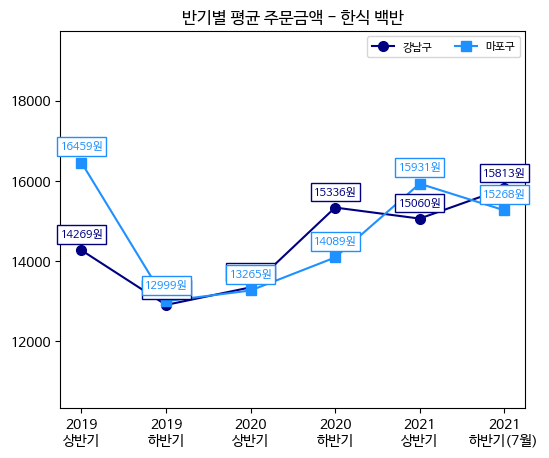

In [5]:
compare_sales(강남_백반, 마포_백반, "한식 백반")

In [6]:
filtered = lst[(lst['세부 업종'] == "구이류") | (lst['세부 업종'] == "백반류, 구이류")] 
강남_구이 = df[df['가게명'].isin(filtered['가게명'])]
filtered = lst2[(lst2['라벨'] == "삼겹살")]
마포_구이 = df2[df2['가게명'].isin(filtered['가게명'])]

6201000.0 9195000.0 14799100.0 16463300.0 19796100.0 2889100.0


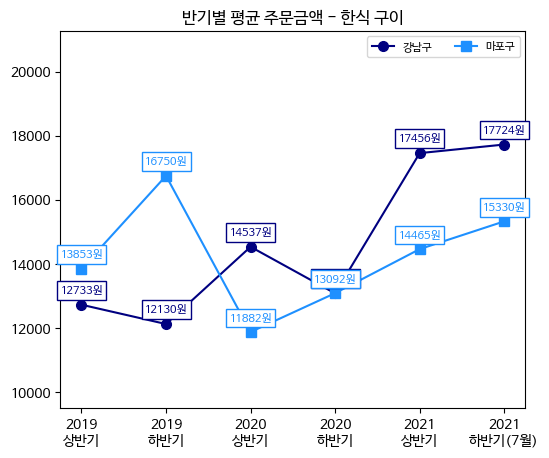

In [7]:
compare_sales(강남_구이, 마포_구이, "한식 구이")

In [8]:
filtered = lst[(lst['세부 업종'] == "백반류, 국탕류") | (lst['세부 업종'] == "면류, 국탕류")| (lst['세부 업종'] == "국탕류")] 
강남_국탕 = df[df['가게명'].isin(filtered['가게명'])]
filtered = lst2[(lst2['라벨'] == "국탕류")|(lst2['라벨'] == "국탕류, 면류")]
마포_국탕 = df2[df2['가게명'].isin(filtered['가게명'])]

18878500.0 25137000.0 25014400.0 33319900.0 27533700.0 4476500.0


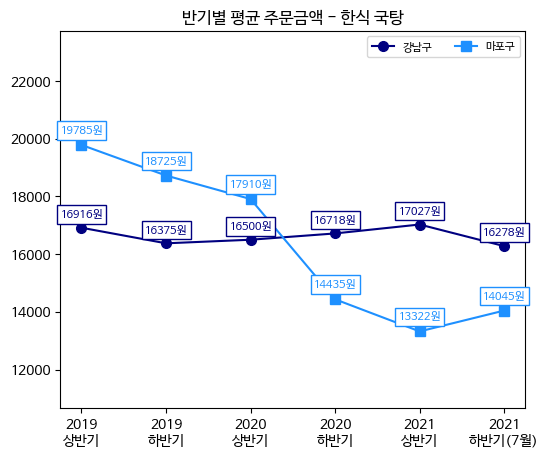

In [9]:
compare_sales(강남_국탕, 마포_국탕, "한식 국탕")

In [10]:
filtered = lst[(lst['세부 업종'] == "면류, 국탕류") | (lst['세부 업종'] == "면류, 백반류")| (lst['세부 업종'] == "면류, 구이류") | (lst['세부 업종'] == "면류")]
강남_면류 = df[df['가게명'].isin(filtered['가게명'])]
filtered = lst2[(lst2['라벨'] == "면류")|(lst2['라벨'] == "삼겹살, 면류") | (lst2['라벨'] == "국탕류, 면류")]
마포_면류 = df2[df2['가게명'].isin(filtered['가게명'])]

6200000.0 8203000.0 23719500.0 22484000.0 34660500.0 8319000.0


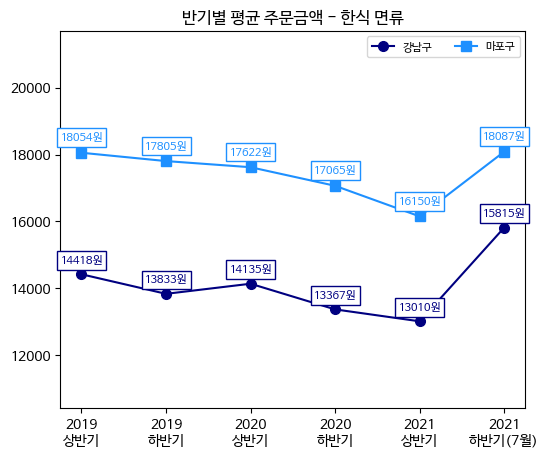

In [11]:
compare_sales(강남_면류, 마포_면류, "한식 면류")

# 일식 건당 매출 추이 비교

In [12]:
# 라벨링 된 것만 가져오기 
df = pd.read_csv("./강남구/강남구_일식돈까스_매출추가_3.csv")
lst = pd.read_csv("./강남구url/강남구_일식돈까스_세부업종.csv")
df2 = pd.read_csv("./마포구_리뷰최종/마포구_일식돈까스_매출추가_3.csv")
lst2 = pd.read_csv("./마포구_리뷰최종/마포구_일식돈까스_세부업종.csv")

33143000.0 37719000.0 55201800.0 110580800.0 106253900.0 19461100.0


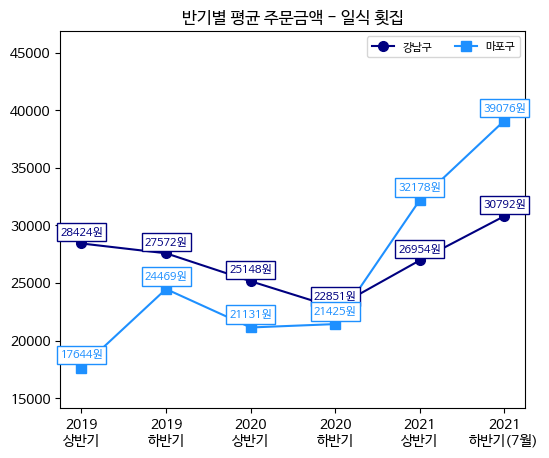

In [13]:
filtered = lst[(lst['세부 업종'] == "횟집")|(lst['세부 업종'] == "횟집 ")]
강남_횟집 = df[df['가게명'].isin(filtered['가게명'])]
filtered = lst2[(lst2['라벨'] == "횟집")|(lst2['라벨'] == "초밥, 횟집")|(lst2['라벨'] == "종합일식, 횟집")]
마포_횟집 = df2[df2['가게명'].isin(filtered['가게명'])]
compare_sales(강남_횟집, 마포_횟집, "일식 횟집")

12091500.0 15205800.0 45352100.0 98681250.0 102834750.0 22881650.0


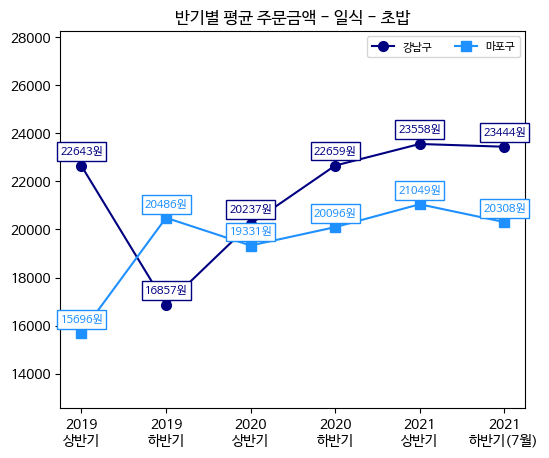

In [14]:
filtered = lst[(lst['세부 업종'] == "초밥")]
강남_초밥 = df[df['가게명'].isin(filtered['가게명'])]
filtered = lst2[(lst2['라벨'] == "초밥")|(lst2['라벨'] == "초밥, 횟집")|(lst2['라벨'] == "초밥, 종합일식")]
마포_초밥 = df2[df2['가게명'].isin(filtered['가게명'])]
compare_sales(강남_초밥, 마포_초밥, "일식 - 초밥")

0.0 0.0 242100.0 1564500.0 1592300.0 294500.0


<ipython-input-3-fdf537c284eb>:78: RuntimeWarning: invalid value encountered in double_scalars
  y = [sum2019_1/reviews2019_1, sum2019_2/reviews2019_2,
<ipython-input-3-fdf537c284eb>:107: RuntimeWarning: invalid value encountered in double_scalars
  y = [sum2_2019_1/reviews2_2019_1, sum2_2019_2/reviews2_2019_2,
<ipython-input-3-fdf537c284eb>:108: RuntimeWarning: invalid value encountered in double_scalars
  sum2_2020_1/reviews2_2020_1, sum2_2020_2/reviews2_2020_2,


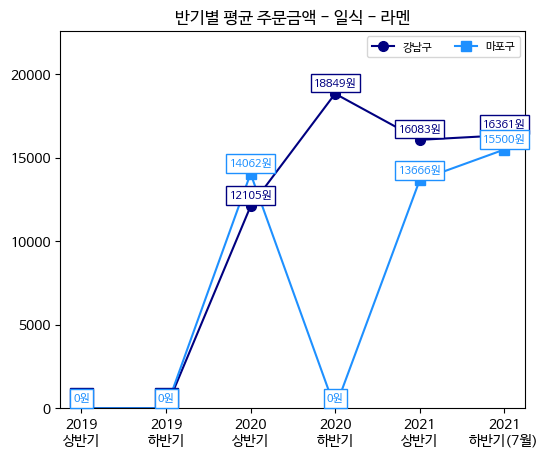

In [15]:
filtered = lst[(lst['세부 업종'] == "라멘")]
강남_라멘 = df[df['가게명'].isin(filtered['가게명'])]
filtered = lst2[(lst2['라벨'] == "라멘")]
마포_라멘 = df2[df2['가게명'].isin(filtered['가게명'])]
compare_sales(강남_라멘, 마포_라멘, "일식 - 라멘")

22900300.0 24431300.0 46916200.0 71099500.0 73405991.82115594 14350600.0


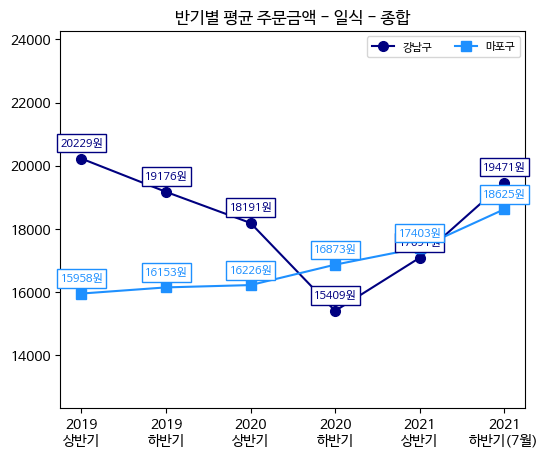

In [16]:
filtered = lst[(lst['세부 업종'] == "덮밥/가정식") | (lst['세부 업종'] == "돈까스") | (lst['세부 업종'] == "카레") | (lst['세부 업종'] == "우동")|(lst['세부 업종'] == "종합")|(lst['세부 업종'] == "샤브샤브")]
강남_종합일식 = df[df['가게명'].isin(filtered['가게명'])]
filtered = lst2[(lst2['라벨'] == "초밥, 종합일식")|(lst2['라벨'] == "종합일식")|(lst2['라벨'] == "종합일식, 횟집")]
마포_종합일식 = df2[df2['가게명'].isin(filtered['가게명'])]
compare_sales(강남_종합일식, 마포_종합일식, "일식 - 종합")

# 양식 리뷰 개수 추이 비교

In [17]:
# 라벨링 된 것만 가져오기 
df = pd.read_csv("./강남구/강남구_피자양식_매출추가_3.csv")
lst = pd.read_csv("./강남구url/강남구_피자양식_세부업종.csv")
df2 = pd.read_csv("./마포구_리뷰최종/마포구_피자양식_매출추가_3.csv")
lst2 = pd.read_csv("./마포구_리뷰최종/마포구_피자양식_세부업종.csv")

6532100.0 5455900.0 30546600.0 37691500.0 51710200.0 12422100.0


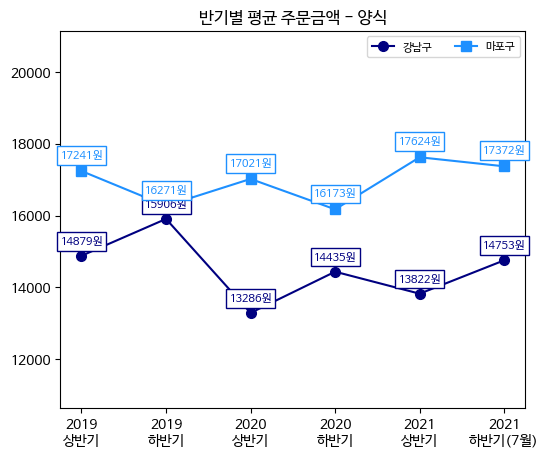

In [18]:
filtered = lst[(lst['세부업종 '] == "파스타")|(lst['세부업종 '] == "스테이크")]
강남_양식 = df[df['가게명'].isin(filtered['가게명'])]
마포_양식 = df2[df2['가게명'].isin(lst2['가게명'])]
compare_sales(강남_양식, 마포_양식, "양식")

# 야식 리뷰 개수 추이 비교

In [19]:
# 라벨링 된 것만 가져오기 
df = pd.read_csv("./강남구/강남구_야식_매출추가_3.csv")
df2 = pd.read_csv("./강남구/강남구_족발보쌈_매출추가_3.csv")
df = pd.concat([df, df2])
lst = pd.read_csv("./강남구url/강남구_야식_세부업종.csv")

df2_1 = pd.read_csv("./마포구_리뷰최종/마포구_야식_매출추가_3.csv")
df2_2 = pd.read_csv("./마포구_리뷰최종/마포구_족발보쌈_매출추가_3.csv")
df2_1 = pd.concat([df2_1, df2_2])
lst2 = pd.read_csv("./마포구_리뷰최종/마포구_야식_세부업종.csv")

67827400.0 102432000.0 218423200.0 253939500.0 212179100.0 48932500.0


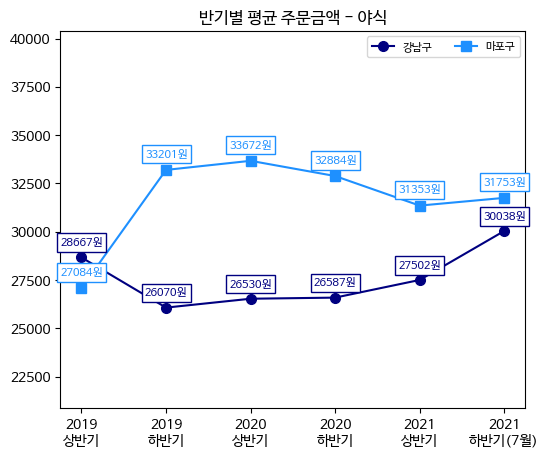

In [20]:
filtered = lst[(lst['세부업종'] == "족발보쌈")|(lst['세부업종'] == "곱창")|(lst['세부업종'] == "삼겹살")|(lst['세부업종'] == "술집")|(lst['세부업종'] == "양고기/양꼬치")|(lst['세부업종'] == "애매")]
강남_야식 = df[df['가게명'].isin(filtered['가게명'])]
마포_야식 = df2_1[df2_1['가게명'].isin(lst2['가게명'])]


compare_sales(강남_야식, 마포_야식, "야식")